<a href="https://colab.research.google.com/github/SFaegheh/Simple-Codes-DL/blob/main/Mnist_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [17]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [18]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

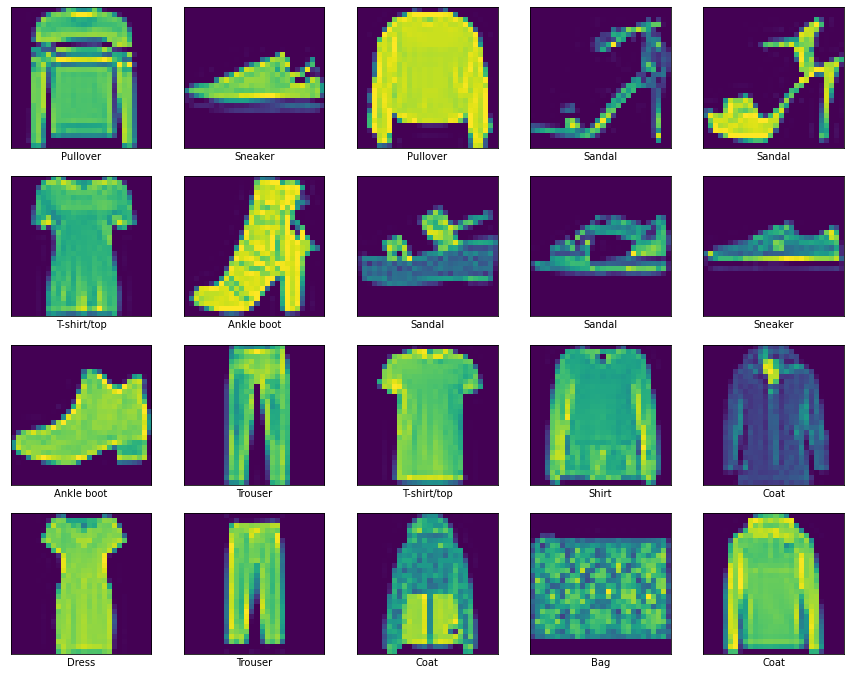

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15,15))

for i in range(5,25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
    pass
plt.show()

In [20]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

x_train = np.array(train_images)
y_train = keras.utils.to_categorical(train_labels, num_classes=10)
x_test = np.array(test_images)
y_test = keras.utils.to_categorical(test_labels, num_classes=10)

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [21]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [22]:
# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(200, 28, 28, 1)
(200, 10)
(9800, 28, 28, 1)
(9800, 10)


In [23]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [25]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [26]:
history = model.fit(x_train, y_train,
          epochs=50, batch_size=64, validation_data = (x_val, y_val))

Epoch 1/50
938/938 [==============================] - 7s 6ms/step - loss: 0.9550 - accuracy: 0.6552 - val_loss: 0.4385 - val_accuracy: 0.8650
Epoch 2/50
938/938 [==============================] - 5s 6ms/step - loss: 0.4658 - accuracy: 0.8300 - val_loss: 0.3829 - val_accuracy: 0.8650
Epoch 3/50
938/938 [==============================] - 5s 6ms/step - loss: 0.4067 - accuracy: 0.8528 - val_loss: 0.3514 - val_accuracy: 0.8700
Epoch 4/50
938/938 [==============================] - 5s 6ms/step - loss: 0.3817 - accuracy: 0.8620 - val_loss: 0.3479 - val_accuracy: 0.8900
Epoch 5/50
938/938 [==============================] - 5s 6ms/step - loss: 0.3587 - accuracy: 0.8674 - val_loss: 0.3234 - val_accuracy: 0.9100
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 0.3508 - accuracy: 0.8724 - val_loss: 0.3157 - val_accuracy: 0.9050
Epoch 7/50
938/938 [==============================] - 5s 6ms/step - loss: 0.3383 - accuracy: 0.8764 - val_loss: 0.3066 - val_accuracy: 0.9050
Epoch 

In [27]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

307/307 [==============================] - 1s 3ms/step - loss: 0.2537 - accuracy: 0.9114

Testing loss: 0.25, acc: 0.91%


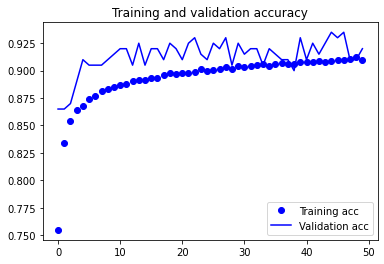

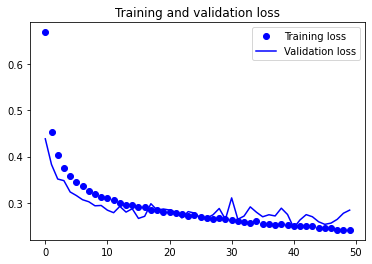

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()